In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torch
from torch import nn

In [2]:
tr_data =  datasets.MNIST(root='data',train=True,download=True,transform= ToTensor())
te_data = datasets.MNIST(root='data',train=False,download=True,transform= ToTensor())

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9912422/9912422 [00:41<00:00, 240297.32it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28881/28881 [00:00<00:00, 91678.48it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1648877/1648877 [00:06<00:00, 248107.21it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [3]:
image, label = tr_data[0]
image.shape

torch.Size([1, 28, 28])

In [5]:
print(tr_data.classes)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


Image shape: torch.Size([1, 28, 28])


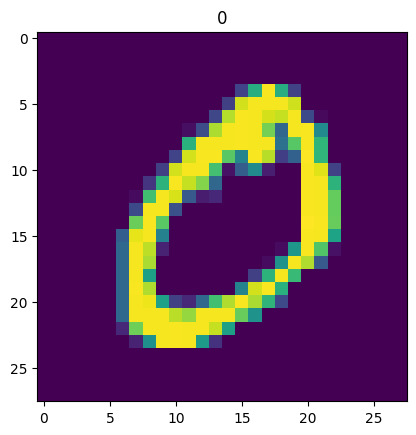

In [7]:
import matplotlib.pyplot as plt
image, label = tr_data[1]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

In [11]:
from torch.utils.data import DataLoader
BATCH_SIZE =32
train_dataloader = DataLoader(tr_data,batch_size =BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(te_data,batch_size=BATCH_SIZE,shuffle=False)

In [12]:
from torch import nn
class FashionMNISTModelV1 (nn.Module):
    def __init__ (self,input_shape,hidden_units,output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,out_features=output_shape),
            nn.ReLU()
        )

    def forward(self,x: torch.Tensor):
        return self.layer_stack(x)    

In [15]:
model0 = FashionMNISTModelV1(input_shape=784,hidden_units=10,output_shape=10)
model0.to('cpu')

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [16]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [18]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),lr=0.1)

In [19]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time



In [24]:
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_on_cpu = timer()
epochs=3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        model0.train()
        y_pred = model0(X)
        loss = loss_fn(y_pred,y)
        train_loss += loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)}samples")
    train_loss /= len(train_dataloader)
    test_loss,test_acc = 0, 0 
    model0.eval()
    with torch.inference_mode():
        for X,y in test_dataloader:
            test_pred=model0(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
looked at 0/60000samples
looked at 12800/60000samples
looked at 25600/60000samples
looked at 38400/60000samples
looked at 51200/60000samples


 33%|███▎      | 1/3 [00:14<00:28, 14.36s/it]


Train loss: 0.75850 | Test loss: 0.73181, Test acc: 72.33%

Epoch: 1
looked at 0/60000samples
looked at 12800/60000samples
looked at 25600/60000samples
looked at 38400/60000samples
looked at 51200/60000samples


 67%|██████▋   | 2/3 [00:26<00:13, 13.12s/it]


Train loss: 0.72026 | Test loss: 0.70507, Test acc: 73.11%

Epoch: 2
looked at 0/60000samples
looked at 12800/60000samples
looked at 25600/60000samples
looked at 38400/60000samples
looked at 51200/60000samples


100%|██████████| 3/3 [00:38<00:00, 12.71s/it]


Train loss: 0.66079 | Test loss: 0.49733, Test acc: 82.53%

Train time on cpu: 38.141 seconds


In [25]:
def preprocess_custom_image(image_path):
    """
    Converts any image into MNIST-compatible tensor:
    - Handles RGB / Grayscale
    - Resizes to 28x28
    - Auto-inverts background if needed
    - Normalizes properly
    """

    # Load image
    image = Image.open(image_path)

    # Convert to grayscale
    image = ImageOps.grayscale(image)

    # Resize to MNIST dimensions
    image = image.resize((28, 28))

    # Convert to tensor
    image_tensor = transforms.ToTensor()(image)

    # Auto-invert if background is white
    # MNIST digits are white on black background
    if image_tensor.mean() > 0.5:
        image_tensor = 1.0 - image_tensor

    # Normalize (MNIST stats)
    image_tensor = transforms.Normalize(
        mean=(0.1307,),
        std=(0.3081,)
    )(image_tensor)

    # Add batch dimension
    image_tensor = image_tensor.unsqueeze(0)

    return image_tensor


In [26]:
from PIL import Image, ImageOps
from torchvision import transforms

# Redefine preprocess_custom_image within this cell to include the necessary imports
# (This is done because the original function definition in KpiQfnpEpAdR was missing these imports,
# and we are constrained to modify only this cell XGcc3_SK5yhZ.)
def preprocess_custom_image(image_path):
    """
    Converts any image into MNIST-compatible tensor:
    - Handles RGB / Grayscale
    - Resizes to 28x28
    - Auto-inverts background if needed
    - Normalizes properly
    """

    # Load image
    image = Image.open(image_path)

    # Convert to grayscale
    image = ImageOps.grayscale(image)

    # Resize to MNIST dimensions
    image = image.resize((28, 28))

    # Convert to tensor
    image_tensor = transforms.ToTensor()(image)

    # Auto-invert if background is white
    # MNIST digits are white on black background
    if image_tensor.mean() > 0.5:
        image_tensor = 1.0 - image_tensor

    # Normalize (MNIST stats)
    image_tensor = transforms.Normalize(
        mean=(0.1307,),
        std=(0.3081,)
    )(image_tensor)

    # Add batch dimension
    image_tensor = image_tensor.unsqueeze(0)

    return image_tensor

In [ ]:
image_path = "/content/192869.png"  # change this

image_tensor = preprocess_custom_image(image_path)

print("Processed image shape:", image_tensor.shape)

In [ ]:
plt.imshow(image_tensor.squeeze(), cmap="gray")
plt.title("Preprocessed Image")
plt.axis("off")

In [ ]:
model0.eval()

with torch.inference_mode():
    logits = model0(image_tensor)
    prediction = logits.argmax(dim=1).item()

print(f"Predicted digit: {prediction}")